# Nagel-Schreckenberg Cellular Automata Model of Vehicular Traffic

After watching the traffic jam experiment done by the Japanese researchers, let us learn about a simple model of vehicular traffic that would reproduce salient features of the experiment.

This is a cellular automata model introduced by Kai Nagel and Michael Schreckenberg in 1992.

<figure>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Kainagel.jpg/440px-Kainagel.jpg" width=200>
    <figcaption>Kai Nagel</figcaption>
</figure>

<figure>
    <img src="https://www.uni-due.de/imperia/md/images/ptt/arbeitsgruppe/fittosize__1200_0_8fe8aeb0c2cf56b90e6ab152d8b06af9_schreckenberg_500n.jpg" width=200>
    <figcaption>Michael Schreckenberg</figcaption>
<figure>

In the Nagel-Schreckenberg (NS) model, a one-lane unidirectional road is divided into <em>cells</em> that are each between 6.0 m and 7.5 m long. Under safe driving conditions, each cell can only accommodate a single vehicle. In the simplest NS model, we do not distinguish between cars, buses, vans, or trucks. All vehicles are the same, and can have speeds $v = 0, 1, \dots, v_{\max}$. For the NS model to reproduce the Japanese experiment qualitatively, all we need is $v_{\max} = 2$.

Suppose at one instant in time $t$, we find $N < L$ vehicles along the road with $L$ cells. Suppose further that vehicle $0 \leq i \leq N-1$ is in the $(0 \leq x_i(t) \leq L-1)$th cell, and its instantaneous velocity is $0 \leq v_i(t) \leq v_{\max}$. Then the rules for updating the NS model are:
<ol>
    <li> <b>acceleration.</b> If $v_i(t) < v_{\max}$, $v_i(t) = v_i(t) + 1$;
    <li> <b>slowing down.</b> If vehicle $j$ is the vehicle just ahead of vehicle $i$, and $x_j(t) - x_i(t) \leq v_i(t)$, reduce the speed of vehicle $i$ to $v_i(t) = x_j(t) - x_i(t) - 1$ to avoid a collision;
    <li> <b>randomization.</b> If $v_i(t) > 0$, reduce the speed of vehicle $i$ to $v_i(t) = v_i(t) - 1$ with probability $p$;
    <li> <b>vehicle motion.</b> Move all vehicles forward, so that $x_i(t+1) = x_i(t) + v_i(t)$.
</ol>

The simplest way to simulate the NS model is to keep a list of the $N$ vehicles. But before we create this list of vehicles, let us specify the length of the road as:

In [37]:
#Add seed
import random
random.seed(42)

In [38]:
# length of road
L = 100

Next, we specify the number of vehicles we want to simulate.

In [39]:
# number of vehicles
N = 25

Now, we can create the list of vehicles, at random positions along the road, and with random speeds.

However, if we do this by assigning the $N$ vehicles random positions, some vehicles might overlap. This would pose problems for the simulation.

Therefore, a safer way to initialize the positions of the $N$ vehicles is to start with $N$ gaps (the first gap being the gap between vehicle $i=0$ and cell $x = 0$ of the road). These gaps can be $1, 2, \dots, \lfloor L/N \rfloor$, so that no vehicle would have a position beyond the $L$ cells of the road.

Gaps [2, 2, 3, 2, 1, 3, 2, 1, 2, 2, 1, 2, 4, 2, 2, 2, 2, 4, 3, 3, 1, 2, 4, 1, 4]
Positions [2, 4, 7, 9, 10, 13, 15, 16, 18, 20, 21, 23, 27, 29, 31, 33, 35, 39, 42, 45, 46, 48, 52, 53, 57]
Velocities [2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 1]


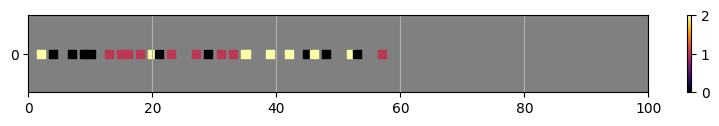

In [40]:
# import numpy
import numpy as np
import matplotlib.pyplot as plt

# create list of gaps
# set vmax
vmax = 2

def get_gaps_pos_vel(L, N, vmax):
    gaps = [ np.random.randint(1, 1 + L//N) for i in range(N) ]
    print("Gaps",gaps)

    # create list of positions
    pos = [ 0 for i in range(N) ]
    pos[0] = gaps[0]
    for i in range(1, N):
        pos[i] = pos[i-1] + gaps[i]
    print("Positions", pos)
    # create list of velocities
    vel = [ np.random.randint(0, vmax+1) for i in range(N) ]
    print("Velocities", vel)
    return gaps,pos,vel

def show_(pos,vel,start_point=0,end_point=L):
        # plot the positions, make a squre
    plt.figure(figsize=(10,1))
    # make a scatter plot has gradient color base on velocity
    plt.scatter(pos, [0]*N, c=vel, cmap='inferno', marker='s')
    # add color bar
    plt.colorbar()
    # black background
    plt.gca().set_facecolor('grey')
    #create vetical grid lines
    plt.grid(axis='x')
    # set y limit with only in teger gap
    plt.yticks([0], [0])
    plt.xlim(start_point, end_point)
    plt.show()


gaps,pos,vel = get_gaps_pos_vel(L, N, vmax)
show_(pos,vel)


Another advantage of creating the positions this way, is that we know by default that the vehicle ahead of vehicle $i$ is vehicle $i+1$.

Let us see what we have right now.

In [41]:
print('i\t x[i]\t v[i]')
for i in range(N):
    print(repr(i) + '\t' + repr(pos[i]) + '\t' + repr(vel[i]))

i	 x[i]	 v[i]
0	2	2
1	4	0
2	7	0
3	9	0
4	10	0
5	13	1
6	15	1
7	16	1
8	18	1
9	20	2
10	21	0
11	23	1
12	27	1
13	29	0
14	31	1
15	33	1
16	35	2
17	39	2
18	42	2
19	45	0
20	46	2
21	48	0
22	52	2
23	53	0
24	57	1


To get familiar with the update rules, let us simulate the NS model for a single time step. To do this, we loop over the vehicles, and overwrite the arrays <code>pos</code> and <code>vel</code>, one rule at a time.

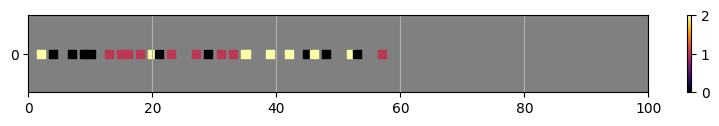

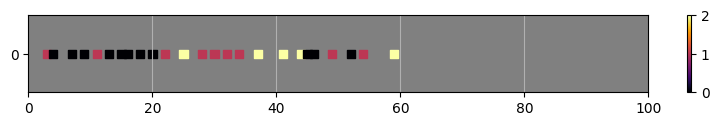

In [42]:
# specify p
p = 0.2
# for-loop over vehicles
def step_(pos,vel,L,N,p=0.2):
    for i in range(N):
        # acceleration
        if vel[i] < vmax:
            vel[i] = vel[i] + 1
        # slowing down
        if i < N-1:
            if vel[i] >= pos[i+1] - pos[i]:
                vel[i] = pos[i+1] - pos[i] - 1
        # impose periodic boundary condition on velocities
        else:
            if vel[i] >= (L - pos[i] - 1) + pos[0]:
                vel[i] = (L - pos[i] - 1) + pos[0] - 1
        # random deceleration
        if vel[i] >= 1:
            if np.random.rand() < p:
                vel[i] = vel[i] - 1
        # move vehicles
        pos[i] = pos[i] + vel[i]
        # impose periodic boundary condition on positions
        if pos[N-1] >= L: #why N-1? would N work?

            newpos0 = pos.pop(N-1)
            newvel0 = vel.pop(N-1)
            pos.insert(0, newpos0-L)
            vel.insert(0, newvel0)
    return pos,vel
show_(pos,vel)
pos,vel = step_(pos,vel,L,N,p)
show_(pos,vel)


Let us now see whether we have implemented the update rules correctly.

In [43]:
print('i\t x[i]\t v[i]')
for i in range(N):
    print(repr(i) + '\t' + repr(pos[i]) + '\t' + repr(vel[i]))

i	 x[i]	 v[i]
0	3	1
1	4	0
2	7	0
3	9	0
4	11	1
5	13	0
6	15	0
7	16	0
8	18	0
9	20	0
10	22	1
11	25	2
12	28	1
13	30	1
14	32	1
15	34	1
16	37	2
17	41	2
18	44	2
19	45	0
20	46	0
21	49	1
22	52	0
23	54	1
24	59	2


Before we go on to run longer simulations of the NS model, let us find a better way to visualize the traffic situation, instead of printing out the positions and velocities of the vehicles every time step.

Ultimately, we would not be showing the traffic situation at one time step, but would be showing the traffic over the entire simulation as a space-time diagram.

Before we can do this, we have to import the PyPlot module.

In [44]:
# import matplotlib.pyplot
import matplotlib.pyplot as plt

To plot the space-time diagram, we will use the <code>matshow()</code> function in PyPlot. The function <code>matshow()</code> takes a two-dimensional array as input. Therefore, after setting the number of time steps to simulate, we initialize the array <code>traffic</code> that would become the input of <code>matshow()</code>.

In [45]:
# set number of time steps to simulate
T = 50
# initialize traffic array
traffic = np.zeros((T,L))
print(T,L) #T=row, L=column

50 100


Thereafter, we start a for-loop over the time steps, and within it a for-loop over the vehicles, to simulate the NS model. At the start of time step $t$, for vehicle $i$ at $x_i$, with velocity $v_i$, we will do the following:
<ol>
    <li> set <code>traffic[t, pos[i]] = 1</code> if $v_i = 0$;
    <li> set <code>traffic[t, pos[i]] = 2</code> if $v_i = 1$; and
    <li> set <code>traffic[t, pos[i]] = 3</code> if $v_i = 2$.
</ol>

In [46]:
# simulation proper
for t in range(T):
    # draw to traffic array
    for i in range(N):
        if vel[i] == 0:
            traffic[t, pos[i]] = 1
        elif vel[i] == 1:
            traffic[t, pos[i]] = 2
        else:
            traffic[t, pos[i]] = 3
    # update traffic
    for i in range(N):
        # acceleration
        if vel[i] < vmax:
            vel[i] = vel[i] + 1
        # slowing down
        if i < N-1:
            if vel[i] >= pos[i+1] - pos[i]:
                vel[i] = pos[i+1] - pos[i] - 1
        # impose periodic boundary condition on velocities
        else:
            if vel[i] >= (L - pos[i] - 1) + pos[0]:
                vel[i] = (L - pos[i] - 1) + pos[0] - 1
        # random deceleration
        if vel[i] >= 1:
            if np.random.rand() < p:
                vel[i] = vel[i] - 1
        # move vehicles
        pos[i] = pos[i] + vel[i]
        # impose periodic boundary condition on positions
        if pos[N-1] >= L:
            newpos0 = pos.pop(N-1)
            newvel0 = vel.pop(N-1)
            pos.insert(0, newpos0-L)
            vel.insert(0, newvel0)

Now that the simulation has been successfully completed, let us show the space-time diagram.

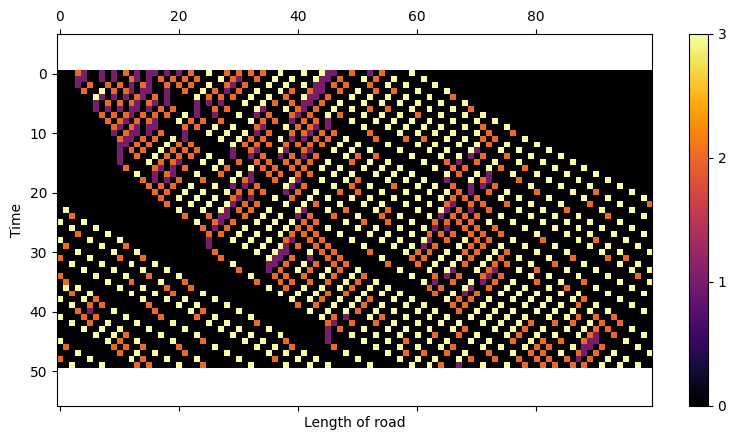

In [47]:
#set figure size
plt.matshow(traffic, cmap='inferno', aspect='auto')
#make color bar exact with the value and no contour
plt.colorbar(ticks=[0,1,2,3])
plt.axis('equal')
#reverse x axis
plt.xlabel('Length of road')
plt.ylabel('Time')
plt.show()

In [48]:
#use Plotly  to plot trafiic by having a slide bar from 0 to T
# each step show traffic[t,:]
import plotly.graph_objects as go
fig = go.Figure()
for t in range(T):
    fig.add_trace(go.Heatmap(z=[traffic[t,:]], colorscale='inferno'))
fig.update_layout(sliders=[dict(steps=[dict(method='update', args=[{'visible': [t == i for i in range(T)]}]) for t in range(T)])])
fig.update_yaxes(tickvals=[0], ticktext=[0])
fig.show()

As we can see,
<ol>
    <li> yellow cells represent vehicles moving at $v_{\max} = 2$;
    <li> some yellow cells become green ($v_i = 1$) because of random deceleration;
    <li> traffic jams (consisting of bunches of vehicles with zero velocity) form behind regions with too many random decelerations.
</ol>

## Make a funciton

In [49]:
class Simulation:
    def __init__(self,L,N,vmax,T,p=0.2):
        ''''
        L: length of road
        N: number of vehicles
        vmax: maximum velocity
        T: number of time steps
        p: probability of random deceleration
        '''
        self.L = L
        self.N = N
        self.vmax = vmax
        self.T = T
        self.p = p
        self.gaps = [ np.random.randint(1, 1 + L//N) for i in range(N) ]
        self.pos = [ 0 for i in range(N) ]
        self.pos[0] = self.gaps[0]
        for i in range(1, N):
            self.pos[i] = self.pos[i-1] + self.gaps[i]
        self.vel = [ np.random.randint(0, vmax+1) for i in range(N) ]
        self.traffic = np.zeros((T,L))

    def simulate(self):
        for t in range(self.T):
            # draw to traffic array
            for i in range(self.N):
                if self.vel[i] == 0:
                    self.traffic[t, self.pos[i]] = 1
                elif self.vel[i] == 1:
                    self.traffic[t, self.pos[i]] = 2
                else:
                    self.traffic[t, self.pos[i]] = 3
            # update traffic
            for i in range(self.N):
                # acceleration
                if self.vel[i] < self.vmax:
                    self.vel[i] = self.vel[i] + 1
                # slowing down
                if i < self.N-1:
                    if self.vel[i] >= self.pos[i+1] - self.pos[i]:
                        self.vel[i] = self.pos[i+1] - self.pos[i] - 1
                # impose periodic boundary condition on velocities
                else:
                    if self.vel[i] >= (self.L - self.pos[i] - 1) + self.pos[0]:
                        self.vel[i] = (self.L - self.pos[i] - 1) + self.pos[0] - 1
                # random deceleration
                if self.vel[i] >= 1:
                    if np.random.rand() < self.p:
                        self.vel[i] = self.vel[i] - 1
                # move vehicles
                self.pos[i] = self.pos[i] + self.vel[i]
                # impose periodic boundary condition on positions
                if self.pos[self.N-1] >= self.L:
                    newpos0 = self.pos.pop(self.N-1)
                    newvel0 = self.vel.pop(self.N-1)
                    self.pos.insert(0, newpos0-self.L)
                    self.vel.insert(0, newvel0)

    def show_time_space(self):
      plt.figure(figsize=(10,20))
      plt.matshow(self.traffic, cmap='inferno', aspect='auto')
      plt.colorbar(ticks=[0,1,2,3])
      plt.axis('equal')
      plt.xlabel('Length of road')
      plt.ylabel('Time (reversed)')
      plt.show()
    def show_time_space_plotly(self):
        fig = go.Figure()
        for t in range(self.T):
            fig.add_trace(go.Heatmap(z=[self.traffic[t,:]], colorscale='inferno'))
        fig.update_layout(sliders=[dict(steps=[dict(method='update', args=[{'visible': [t == i for i in range(self.T)]}]) for t in range(self.T)])])
        fig.update_yaxes(tickvals=[0], ticktext=[0])
        fig.show()

# Additional Exercises

## Simulations at Different Densities

In the above simulation, we have $N = 25$ vehicles over a road with $L = 100$.

You should plot the space-time diagrams for simulations at different densities $N/L$ to gain an intuition into the behavior of the NS model.

<Figure size 1000x2000 with 0 Axes>

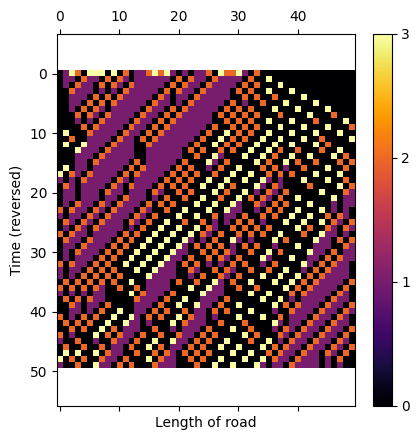

In [50]:
sim = Simulation(50,25,2,50)
sim.simulate()
sim.show_time_space()
sim.show_time_space_plotly()

<Figure size 1000x2000 with 0 Axes>

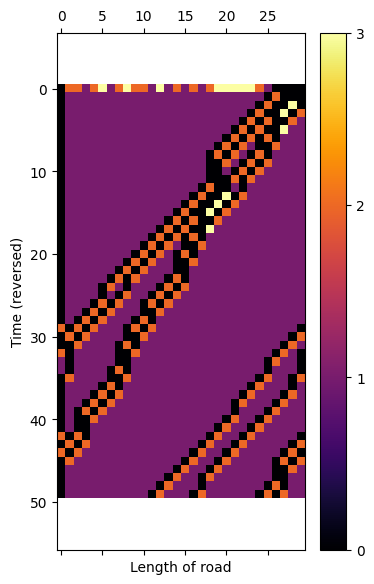

In [51]:
sim = Simulation(30,25,2,50)
sim.simulate()
sim.show_time_space()
sim.show_time_space_plotly()

<Figure size 1000x2000 with 0 Axes>

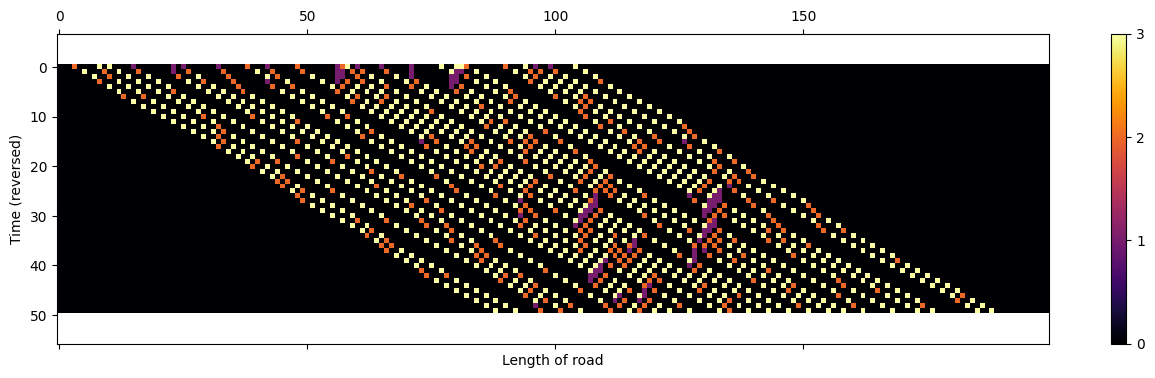

In [52]:
sim = Simulation(200,25,2,50)
sim.simulate()
sim.show_time_space()
sim.show_time_space_plotly()

## Simulations with Different $v_{\max}$

In the above simulation, we used $v_{\max} = 2$.

Run simulations with other values of $v_{\max}$, to better understand the behavior of the NS model.

<Figure size 1000x2000 with 0 Axes>

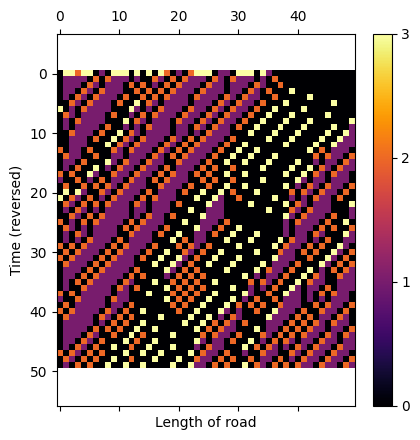

In [53]:
sim = Simulation(50,25,4,50)
sim.simulate()
sim.show_time_space()
sim.show_time_space_plotly()

<Figure size 1000x2000 with 0 Axes>

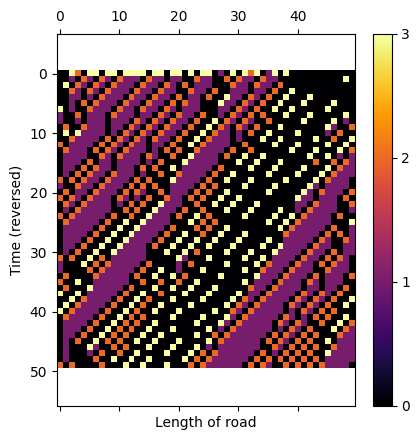

In [54]:
sim = Simulation(50,25,10,50)
sim.simulate()
sim.show_time_space()
sim.show_time_space_plotly()

## Plotting the Fundamental Diagram

Choose a smaller region within the road, say $0 \leq x \leq 20$, as your measurement region.

Every 20 time steps, compute the density $\rho$, which is the number of vehicles in this region divided by 20, and the average velocity $\bar{v}$ over all vehicles in this region.

Collect a large number of points $(\rho, \bar{v})$, and plot the scatter diagram of $\bar{v}$ against $\rho$. This is called the fundamental diagram of vehicular traffic.

In [55]:
class FundamentalDiagram:
    #inherit traffic from Simulation
    def __init__(self,traffic,roi,monitor_time):
        '''
        traffic: traffic array
        roi: region of interest
        monitor_time: time interval to monitor the traffic
        '''
        self.traffic = traffic
        if self.traffic.shape[1] < roi[1]:
            raise ValueError(f'The region of interest is larger than the road: {traffic.shape[1]}')
        self.roi = roi
        if self.traffic.shape[0] < monitor_time:
            raise ValueError(f'The monitor time is longer than the simulation time: {traffic.shape[0]}')
        self.monitor_time = monitor_time

    def calculate(self):
        i = 0
        self.density = np.zeros(self.traffic.shape[0]//self.monitor_time)
        self.avg_velocity = np.zeros(self.traffic.shape[0]//self.monitor_time)
        for t in range(self.traffic.shape[0]):
            if t%self.monitor_time == 0:
                self.density[i] = np.count_nonzero(self.traffic[t-1][self.roi[0]:self.roi[-1]+1])/(self.roi[-1]-self.roi[0]+1)
                self.avg_velocity[i] = np.mean(self.traffic[t][np.nonzero(self.traffic[t][self.roi[0]:self.roi[-1]+1])])
                i += 1

    def show(self):
        plt.scatter(self.density, self.avg_velocity)
        plt.xlabel('Density')
        plt.ylabel('Average velocity')
        plt.title('Fundamental diagram')
        plt.show()


In [56]:
sim = Simulation(50,25,2,1000)
sim.simulate()
traffic = sim.traffic
traffic.shape

(1000, 50)

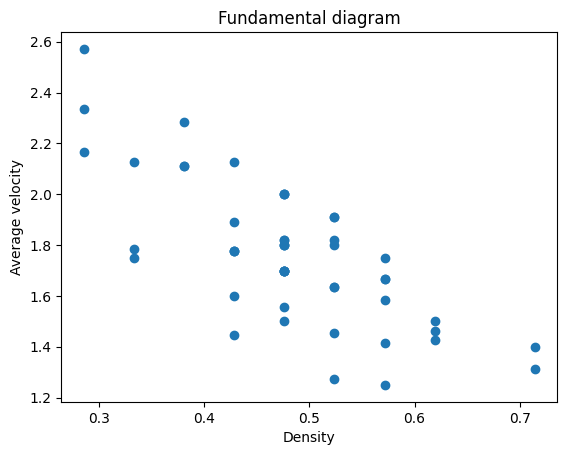

In [57]:
FD = FundamentalDiagram(traffic,[0,20],20)
FD.calculate()
FD.show()

# Further Explorations

## Two Lanes and Overtaking

Most roads have more than one lane, and allows overtaking to occur.

Think about how you would modify the simplest NS model shown here, so that you can simulate two-lane vehicular traffic.

Besides the additional complication for specifying the positions of vehicles, you will also need to add new rules, so that a vehicle can make use of the second lane to overtake another vehicle.

In [58]:
lanes = 2
N = 30
def get_pos_vel_multilanes(L,N,vmax,lanes=2):
  gaps = np.random.randint(1, L//N + 1, size=(lanes, int(np.ceil(N/lanes))))
  vel = np.random.randint(0, vmax+1, size=(lanes, int(np.ceil(N/lanes))))
  exeed = np.count_nonzero(gaps) - N
  while exeed >0:
    random_lane =np.random.randint(lanes)
    if gaps[random_lane,-1] != 0:
      gaps[random_lane,-1] = 0
      vel[random_lane,-1] = 0
    else: continue
    exeed -= 1
  pos = np.zeros(gaps.shape,dtype=int)
  pos[:,0] = gaps[:,0]
  for i in range(1,gaps.shape[1]):
      pos[:,i] =  pos[:,i-1] + gaps[:,i]
  return pos, vel
pos, vel = get_pos_vel_multilanes(L, N, vmax,lanes)


In [59]:
def show_multilane(pos,vel,start_point=0,end_point=L):
    fig = plt.figure(figsize=(10,1))
    posy,posx = zip(*pos)
    # Plot the scatter plot
    plt.scatter(posx, posy,c=vel,cmap='inferno', marker='s')
    plt.colorbar()
    # black background
    plt.gca().set_facecolor('grey')
    #create vetical grid lines
    plt.grid(axis='x')
    plt.yticks([i for i in range(lanes)], [i for i in range(lanes)])
    plt.xlim(start_point, end_point)
    plt.show()

def make_traffic(pos,vel):
    # Flatten the arrays
    posx = pos.flatten()
    posy = np.repeat(np.arange(pos.shape[0]), pos.shape[1])
    vel_flat = vel.flatten()
    vehicle = [(y,x,v) for y,x,v in zip(posy,posx,vel_flat)]
    return np.array(sorted(vehicle,key=lambda x:x[1]))

vehicles = make_traffic(pos,vel)

In [60]:
import collections
def step_multilanes(vehicles,L,N,lanes,p=0.2):
    num_car = collections.Counter((np.transpose(vehicles[:,:2])[0]))
    pos_copy = pos.copy()
    for i,(posy,posx,vel) in enumerate(vehicles):
        N = num_car[posy]
        # acceleration
        if vel < vmax:
            vel = vel + 1
        # slowing down
        for j in range(i+1, len(vehicles)):
            if vehicles[j,0] == posy:  # Check if the vehicle is in the same row
              if vel >= vehicles[j,1] - posx:
                vel = max(0,vehicles[j,1] - posx - 1)
                if vel !=0:
                  posy,posx,vel = change_lane(vehicles,i,posy,posx,vel,lanes)
                break
        # impose periodic boundary condition on velocities
        else:
            if vel >= (L - posx - 1) + posx:
                vel = (L - posx- 1) + posx - 1
        # random deceleration
        if vel >= 1:
            if np.random.rand() < p:
                vel = vel - 1
        # move vehicles
        posx = posx + vel
        # impose periodic boundary condition on positions
        if posx >= L:
            new_posx = posx - L
            # Delete the last row in pos and vel
            vehicles = np.delete(vehicles, i, axis=0)
            # Insert newpos0 and newvel0 at the beginning of pos and vel
            vehicles = np.insert(vehicles, 0, (posy,new_posx,vel), axis=0)
            break
        vehicles[i] = (posy,posx,vel)
    return vehicles

def change_lane(vehicles,i,posy,posx,vel,lanes):
    #check if there is a vehicle in adjacent lane
    chk_up = not np.any(np.all(vehicles[:,:2] == np.array([posy+1, posx]), axis=1)) if posy < lanes-1 else False
    chk_down = not np.any(np.all(vehicles[:,:2] == np.array([posy-1, posx]), axis=1)) if posy > 0 else False
    if chk_up:
        # print("Change lane!",posy,posx)
        return posy+1,posx,vel
    elif chk_down:
        # print("Change lane!",posy,posx)
        return posy-1,posx,vel
    else: return posy,posx,vel

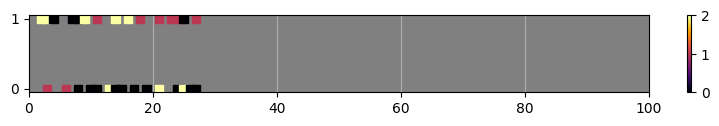

1


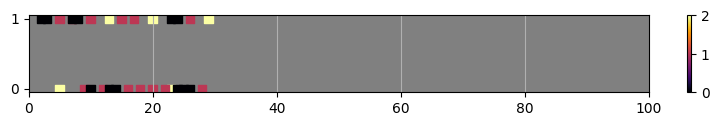

2


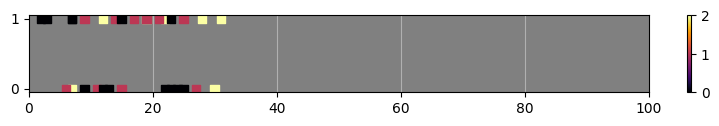

3


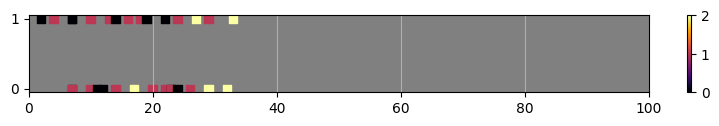

4


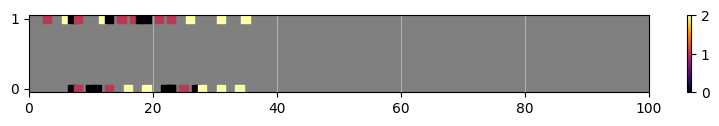

5


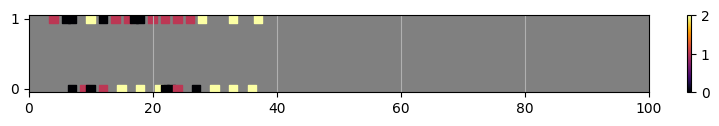

6


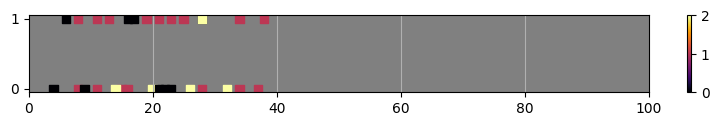

7


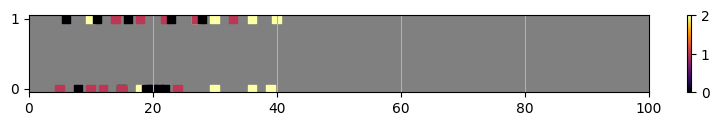

8


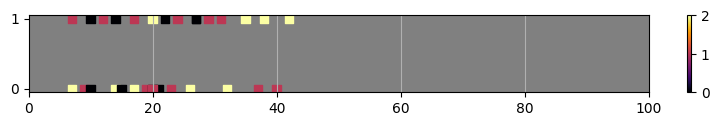

9


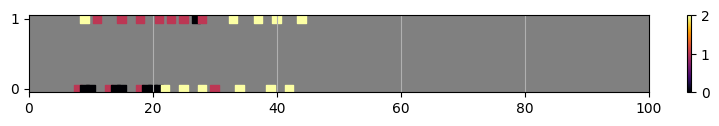

10


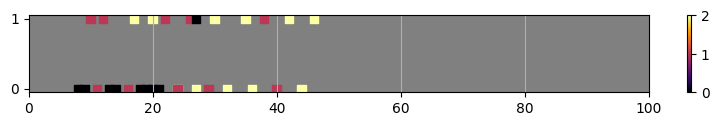

11


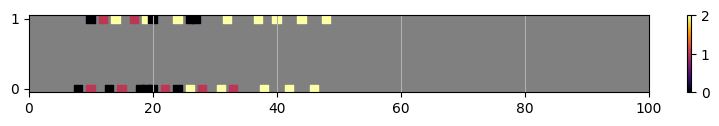

12


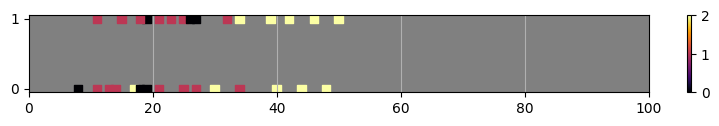

13


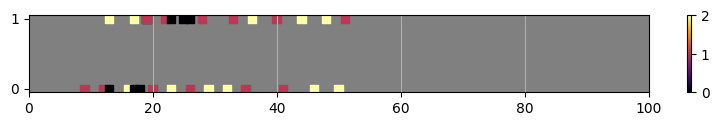

14


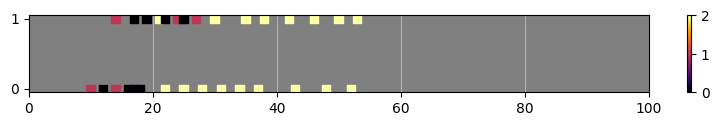

15


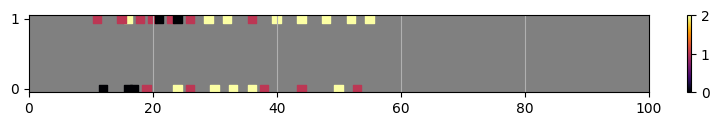

16


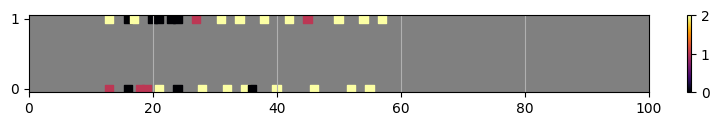

17


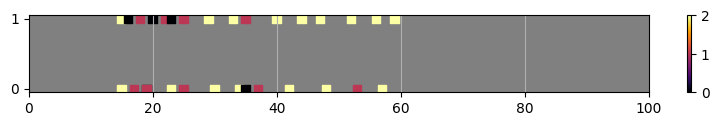

18


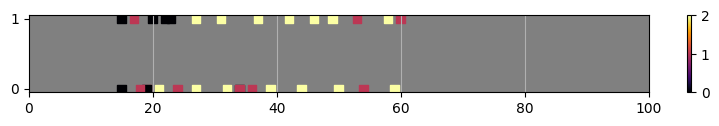

19


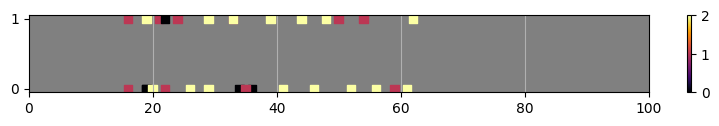

20


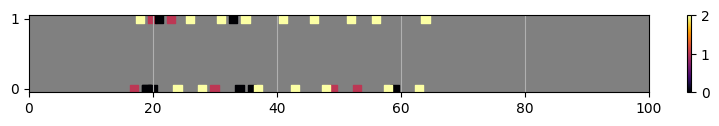

21


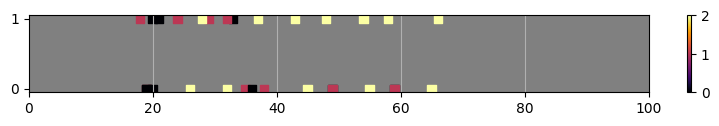

22


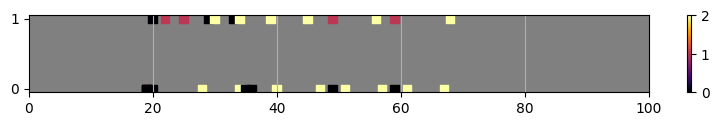

23


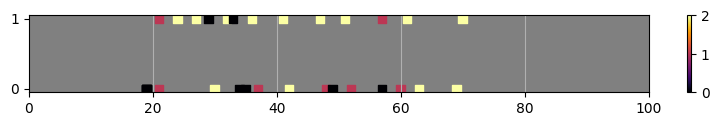

24


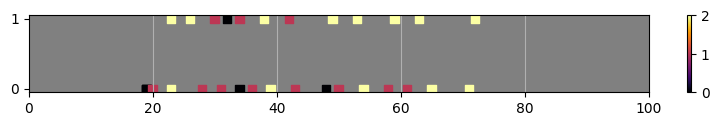

25


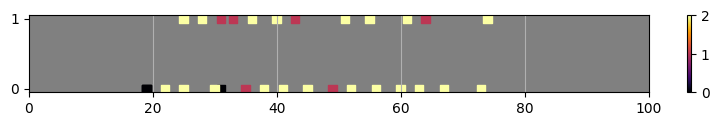

26


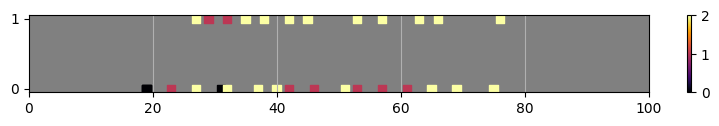

27


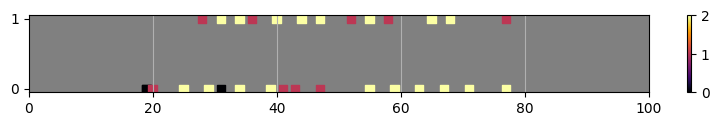

28


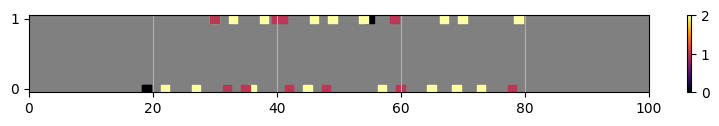

29


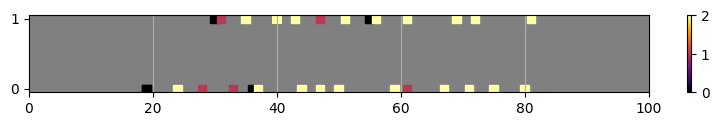

30


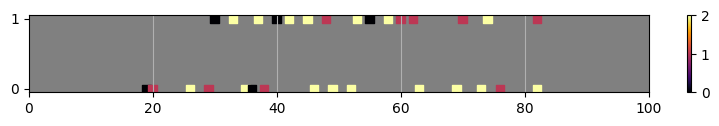

In [61]:
show_multilane(vehicles[:,:2],vehicles[:,-1])
for i in range(30):
  print(i+1)
  vehicles = step_multilanes(vehicles,L,N,lanes,p)
  show_multilane(vehicles[:,:2],vehicles[:,-1])

## City Traffic and Traffic Lights

In this session, we have only discussed vehicular traffic in 1D. Naturally, in a city, vehicular traffic is 2D, on a grid of criss-crossing roads.

Besides this challenge to programming the NS model, city traffic is also frequently regulated by traffic lights. Again, think of the rules you need to perform city traffic simulations.

In [149]:
def show_crosslanes(vehicles,start_point=-L,end_point=L):
    '''
    positive y axis is from top to bottom and x axis is from left to right
    then plot the opposite way.
    cross_lane : number of in to cross road lanes and out to cross road lanes i.e. 2x2

    '''
    fig = plt.figure(figsize=(10,10))

    # Plot the scatter plot
    for i in range(4):
      posy,posx = zip(*vehicles[vehicles[:,0] == i][:,:2])
      vel = vehicles[vehicles[:,0] == i][:,-1]
      if i ==0:
          plt.scatter(posx, posy,c=vel,cmap='inferno', marker='s')
          # plt.show()
      elif i ==1:
          plt.scatter([0 for _ in posy], posx,c=vel,cmap='inferno', marker='s')
      elif i ==2:
          plt.scatter([-j for j in posx], [0 for _ in posy],c=vel,cmap='inferno', marker='s')
      elif i ==3:
          plt.scatter([0 for _ in posy], [-j for j in posx],c=vel,cmap='inferno', marker='s')
    plt.colorbar()
    # black background
    plt.gca().set_facecolor('grey')
    #create vetical grid lines
    plt.grid(axis='x')
    # plt.yticks([i for i in range(start_point,end_point)], [i for i in range(start_point,end_point)])
    # plt.xlim(start_point, end_point)
    plt.show()

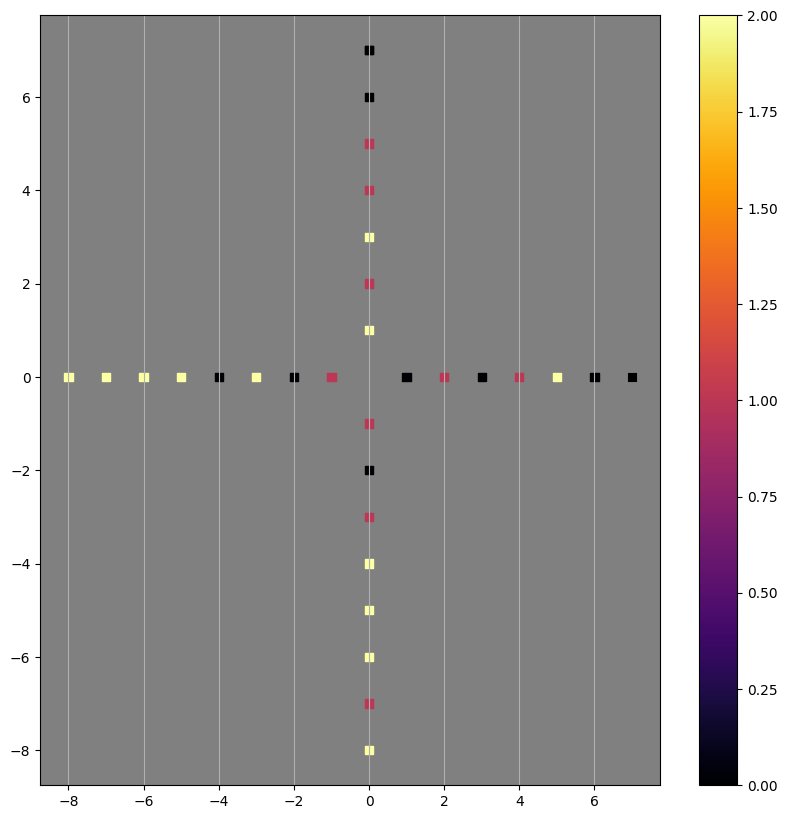

In [150]:
# crossroad
cross_lane = 4
L = 30
pos, vel = get_pos_vel_multilanes(L, N, vmax,cross_lane)
vehicles = make_traffic(pos,vel)
show_crosslanes(vehicles)